## Observations and Insights 

Note: you may need to restart the kernel to use updated packages.


In [160]:
# Dependencies and Setup
%matplotlib notebook
%pylab inline

import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
import seaborn as sns
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




Populating the interactive namespace from numpy and matplotlib


In [162]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
3780,r944,45,41.581521,2
3781,u364,45,31.023923,3
3782,p438,45,61.433892,1
3783,x773,45,58.634971,4


In [163]:

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [164]:
# Combine the data into a single dataset
combined_mouse_data = study_results.join(mouse_metadata.set_index('Mouse ID'),
                                         on='Mouse ID')
# Display the data table for preview
combined_mouse_data
 



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
3780,r944,45,41.581521,2,Capomulin,Male,12,25
3781,u364,45,31.023923,3,Capomulin,Male,18,17
3782,p438,45,61.433892,1,Ceftamin,Female,11,26
3783,x773,45,58.634971,4,Placebo,Female,21,30


In [165]:
# Checking the number of mouse_metadata
combined_mouse_data["Mouse ID"].value_counts()



g989    26
a275    20
a444    20
y260    20
o331    20
        ..
o848     2
u153     2
d133     2
h428     2
l872     2
Name: Mouse ID, Length: 249, dtype: int64

In [166]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
con_duplicate = combined_mouse_data.duplicated(subset=[ 'Mouse ID','Timepoint'])

con_duplicate.value_counts()



True     1897
False    1888
dtype: int64

In [167]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_f = combined_mouse_data[con_duplicate]
duplicates_f

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26
...,...,...,...,...,...,...,...,...
3779,z795,45,65.741070,3,Naftisol,Female,13,29
3780,r944,45,41.581521,2,Capomulin,Male,12,25
3781,u364,45,31.023923,3,Capomulin,Male,18,17
3782,p438,45,61.433892,1,Ceftamin,Female,11,26


In [168]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_data[combined_mouse_data["Mouse ID"].isin(duplicates_f["Mouse ID"])]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
3780,r944,45,41.581521,2,Capomulin,Male,12,25
3781,u364,45,31.023923,3,Capomulin,Male,18,17
3782,p438,45,61.433892,1,Ceftamin,Female,11,26
3783,x773,45,58.634971,4,Placebo,Female,21,30


In [169]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].value_counts()

g989    26
a275    20
a444    20
y260    20
o331    20
        ..
o848     2
u153     2
d133     2
h428     2
l872     2
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drugs = clean_mouse_data.groupby(["Drug Regimen"])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = grouped_drugs.mean()["Tumor Volume (mm3)"]
drug_mean.name = "Mean"
drug_median = grouped_drugs.median()["Tumor Volume (mm3)"]
drug_median.name = "Median"
drug_var = grouped_drugs.var()["Tumor Volume (mm3)"]
drug_var.name = "Variance"
drug_std = grouped_drugs.std()["Tumor Volume (mm3)"]
drug_std.name = "Standard Deviation"
drug_sem = grouped_drugs.sem()["Tumor Volume (mm3)"]
drug_sem.name = "SEM"
# This method produces everything in a single groupby function

summ_stats_by_drugs = pd.concat([drug_mean,
                                 drug_median,
                                 drug_var,
                                 drug_std,
                                 drug_sem], axis = 1).reset_index()
summ_stats_by_drugs

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.893412,4.989330,0.232629
1,Ceftamin,52.591172,51.776157,39.179501,6.259353,0.331745
2,Infubinol,52.884795,51.820584,43.007195,6.557987,0.347573
3,Ketapril,55.235638,53.698743,68.370768,8.268662,0.426424
4,Naftisol,54.331565,52.509285,65.995114,8.123738,0.421196
5,Placebo,54.033581,52.288934,60.998642,7.810163,0.410493
6,Propriva,52.322552,50.854632,42.219135,6.497625,0.362099
7,Ramicane,40.216745,40.673236,23.435085,4.840980,0.226700
8,Stelasyn,54.182395,52.431737,58.515481,7.649541,0.402607
9,Zoniferol,53.236507,51.818479,48.399655,6.956986,0.364645


## Bar and Pie Charts

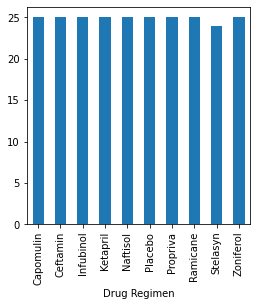

In [171]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_by_drug = grouped_drugs['Mouse ID'].nunique()
mouse_by_drug.plot(figsize=(4,4),kind='bar')



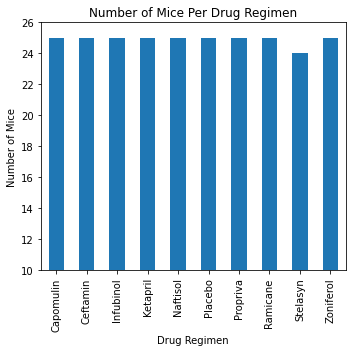

In [172]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig1, ax1 = plt.subplots(figsize = (5,5))
mouse_by_drug.plot(kind = 'bar')
plt.ylim(10,26)
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

fig1.tight_layout()


In [173]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_by_gen = clean_mouse_data["Sex"].value_counts()
mouse_by_gen


Male      1916
Female    1869
Name: Sex, dtype: int64

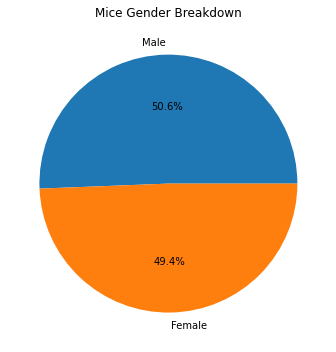

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.pie(mouse_by_gen, labels=("Male", "Female"), autopct="%1.1f%%")
plt.title("Mice Gender Breakdown")
fig2.tight_layout()

## Quartiles, Outliers and Boxplots

In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
grouped_mice = clean_mouse_data.groupby(["Mouse ID",
                                           "Drug Regimen"])
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_drugs = ("Capomulin","Ramicane","Infubinol","Ceftamin")
df_filtered_drugs = pd.DataFrame({"Drug Regimen":filtered_drugs})

max_timepoints = grouped_mice["Timepoint"].max()

max_tp = max_timepoints.to_frame()

max_tp = max_tp.reset_index()


max_tp

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a262,Placebo,45
3,a275,Ceftamin,45
4,a366,Stelasyn,30
...,...,...,...
244,z435,Propriva,10
245,z578,Ramicane,45
246,z581,Infubinol,45
247,z795,Naftisol,45


In [176]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = clean_mouse_data["Drug Regimen"].unique().tolist()
sorted_drugs = sorted(drugs)
sorted_drugs

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [182]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of in
drugs.boxplot(columns=["Drug Regimen"],by="Mouse ID")

AttributeError: 'list' object has no attribute 'boxplot'

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
